In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
X_train.shape

(455, 30)

In [4]:
unique_values = np.unique(y_train)
unique_values

array([0, 1])

In [5]:
var_datasets = []

for idx, value in enumerate(unique_values):
    new_list = []
    var_datasets.append(new_list)
    for i in range(len(y_train)):
        if y_train[i] == value:
            var_datasets[idx].append(X_train[i])

In [6]:
len(var_datasets)

2

In [7]:
# racunanje srednjih vrednosti za svaku klasu
var_means = []

for dataset in var_datasets:
    sum = 0
    count = 0
    for row in dataset:
        sum += row
        count += 1
    var_means.append(sum/count)

In [8]:
# racunanje varijanse za svaku klasu
var_differences = []

for idx, dataset in enumerate(var_datasets):
    dataset_difference = []
    for row in dataset:
        difference = row - var_means[idx]
        dataset_difference.append(difference)
    var_differences.append(dataset_difference)
    
squared_differences = []

for dataset in var_differences:
    squared_dataset = []
    
    for row in dataset:
        squared_row = [i ** 2 for i in row]
        squared_dataset.append(squared_row)
        
    squared_differences.append(squared_dataset)
    
variances = []

for dataset in squared_differences:
    sum = 0
    count = 0
    for row in dataset:
        row_array = np.array(row)
        sum += row_array
        count += 1
    result = sum/count
    variances.append(result)

<h3>var_means - srednje vrednosti za svaku klasu</h3>
<h3>variances - varijanse za svaku klasu</h3>

In [9]:
# gausova funkcija gustine verovatnoce
def log_gaussian_pdf(x, mean, std_dev):
    exponent = -((x - mean)**2 / (2 * std_dev**2 ))
    return exponent - np.log(np.sqrt(2 * np.pi) * std_dev)

In [10]:
# klasne verovatnoce
test_set_probabilities = []

for row in X_test: # za svaki red
    row_probabilities = []
    for j in range(len(var_datasets)): # za svaku klasu
        probability = 0
        for idx, feature in enumerate(row): # za svaki feature
            gaussian_probability = log_gaussian_pdf(feature, var_means[j][idx], variances[j][idx])
            probability += gaussian_probability
        row_probabilities.append(probability)
    test_set_probabilities.append(row_probabilities)

In [11]:
# predvidjanje
predictions = [np.argmax(probs) for probs in test_set_probabilities]

In [12]:
def accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1

    return correct / total

In [13]:
acc = accuracy(y_test, predictions)
print(f"Accuracy: {acc*100}%")

Accuracy: 76.31578947368422%


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.76      0.90      0.83        71

    accuracy                           0.76       114
   macro avg       0.76      0.72      0.73       114
weighted avg       0.76      0.76      0.75       114



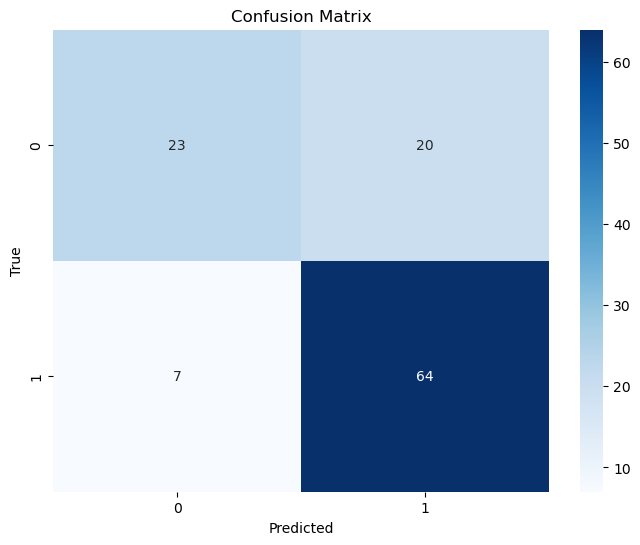

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()